<a href="https://colab.research.google.com/github/Ragavendhra-Ramanan/Ml_Course/blob/main/CarPrice_Zoomcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-02 15:18:44--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.04s   

2023-10-02 15:18:44 (34.1 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



# Load Data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
features=['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']
data=df[features]

In [5]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [6]:
data=data.fillna(0)
data.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [7]:
data=data.rename({'msrp':'price'},axis=1)
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


* Question 1
* What is the most frequent observation (mode) for the column transmission_type?

In [8]:
data['transmission_type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

* Automatic is the most frequent transmission type.

* CORRELATION :
* Create the correlation matrix for the numerical features of your dataset.
* In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?



<ipython-input-9-4f9672945285>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True,fmt = '.2f',linewidth=1)


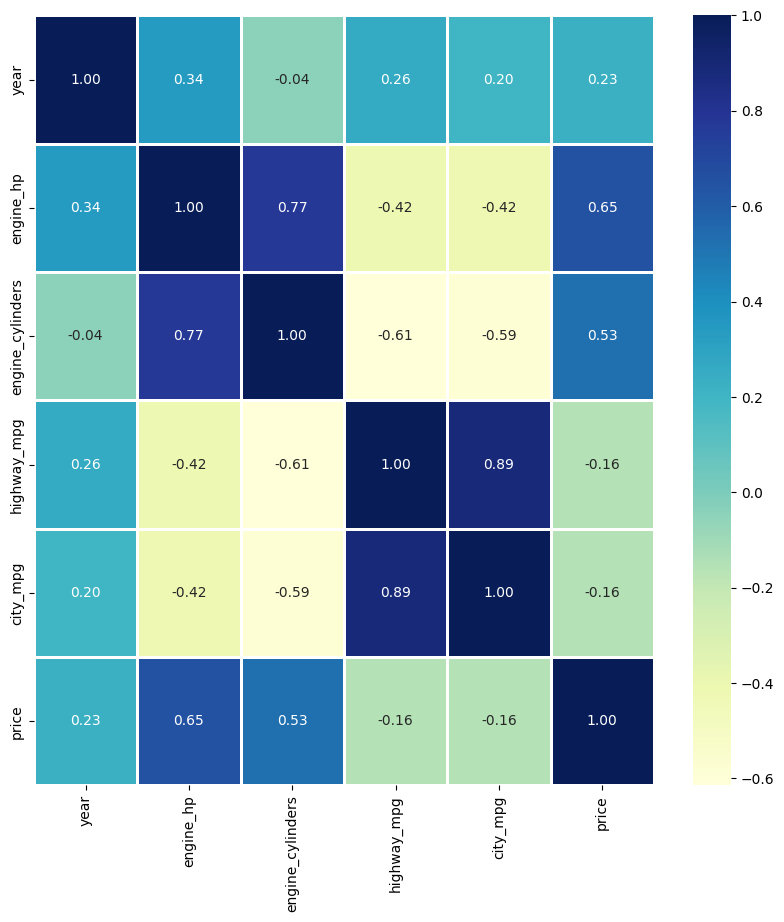

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True,fmt = '.2f',linewidth=1)
plt.show()

* highway_mpg and city_mpg has the highest correlation value .

* Make price binary
* Now we need to turn the price variable from numeric into a binary format.
* Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.
* Split the data
* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value (above_average) is not in your dataframe.

In [10]:
data['above_average']=data['price'].apply(lambda x:1 if x>data['price'].mean() else 0)
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [11]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.20, random_state=1)

In [12]:
len(df_train), len(df_val), len(df_test)

(7624, 1907, 2383)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train_log_price=np.log1p(df_train.price.values)
y_val_log_price=np.log1p(df_val.price.values)
y_test_log_price=np.log1p(df_test.price.values)

In [15]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [16]:
del df_train['price']
del df_val['price']
del df_test['price']

* Question 3
* Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
* Round the scores to 2 decimals using round(score, 2).
* Which of these variables has the lowest mutual information score?

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7624 entries, 0 to 7623
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               7624 non-null   object 
 1   model              7624 non-null   object 
 2   year               7624 non-null   int64  
 3   engine_hp          7624 non-null   float64
 4   engine_cylinders   7624 non-null   float64
 5   transmission_type  7624 non-null   object 
 6   vehicle_style      7624 non-null   object 
 7   highway_mpg        7624 non-null   int64  
 8   city_mpg           7624 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 536.2+ KB


In [18]:
def mutual_info_score_value(x):
  return round(mutual_info_score(x,y_train),2)

In [19]:
categorical_columns=['make','model','transmission_type','vehicle_style']
mi=df_train[categorical_columns].apply(mutual_info_score_value)
mi.sort_values(ascending=False)

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

* Question 4
* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset.
* Include them using one-hot encoding.
* Fit the model on the training dataset.
* To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
* model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [20]:
def get_train_and_val_data(features):
 dv=DictVectorizer(sparse=False)
 train_dict_values=df_train[features].to_dict(orient='records')
 train_dict_values[0]
 x_train=dv.fit_transform(train_dict_values)
 val_dict_values=df_val[features].to_dict(orient='records')
 x_val=dv.transform(val_dict_values)
 return x_train,x_val

In [21]:
x_train,x_val=get_train_and_val_data(df_train.columns.tolist())

In [22]:
def get_accuracy(x_train,x_val):
 lr=LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
 lr.fit(x_train,y_train)
 y_pred=lr.predict(x_val)
 accuracy=round(sum(y_pred==y_val)/len(x_val),2)
 print("Validation Accuracy",accuracy)
 return sum(y_pred==y_val)/len(x_val)

In [23]:
accuracy=get_accuracy(x_train,x_val)

Validation Accuracy 0.95


* **Question 5**
* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?



In [24]:
features=df_train.columns.tolist()
for i in range(len(features)):
  final_features=[features[j] for j in range(len(features)) if j!=i]
  x_train,x_val=get_train_and_val_data(final_features)
  print("After removing feature",features[i])
  val_accuracy=get_accuracy(x_train,x_val)
  print("Accucary Difference",abs(accuracy-val_accuracy))
  print("********************************")

After removing feature make
Validation Accuracy 0.94
Accucary Difference 0.0057682223387520715
********************************
After removing feature model
Validation Accuracy 0.91
Accucary Difference 0.03932878867330891
********************************
After removing feature year
Validation Accuracy 0.95
Accucary Difference 0.0057682223387519604
********************************
After removing feature engine_hp
Validation Accuracy 0.94
Accucary Difference 0.011536444677504032
********************************
After removing feature engine_cylinders
Validation Accuracy 0.95
Accucary Difference 0.000524383848977461
********************************
After removing feature transmission_type
Validation Accuracy 0.95
Accucary Difference 0.002621919244887305
********************************
After removing feature vehicle_style
Validation Accuracy 0.93
Accucary Difference 0.01625589931830107
********************************
After removing feature highway_mpg
Validation Accuracy 0.93
Accucary Di

* year feature has least difference hence its the least useful feature.

* Question 6
* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column price. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
* This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
* Round your RMSE scores to 3 decimal digits.
* Which of these alphas leads to the best RMSE on the validation set?



In [25]:
def rmse(y_true,y_pred):
  error=(y_true-y_pred)**2
  return round(np.sqrt(sum(error)),3)

In [26]:
alpha=[0,0.01,0.1,1,10]
for val in alpha:
  rd=Ridge(solver='sag',random_state=42,alpha=val)
  x_train,x_val=get_train_and_val_data(features)
  rd.fit(x_train,y_train_log_price)
  y_pred=rd.predict(x_val)
  print("Alpha value: ",val,"rmse: ",rmse(y_val_log_price,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha value:  0 rmse:  21.062


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha value:  0.01 rmse:  21.062


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha value:  0.1 rmse:  21.062


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha value:  1 rmse:  21.063
Alpha value:  10 rmse:  21.071


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


* 0 has better rmse and being smaller we can take 0 as best alpha.